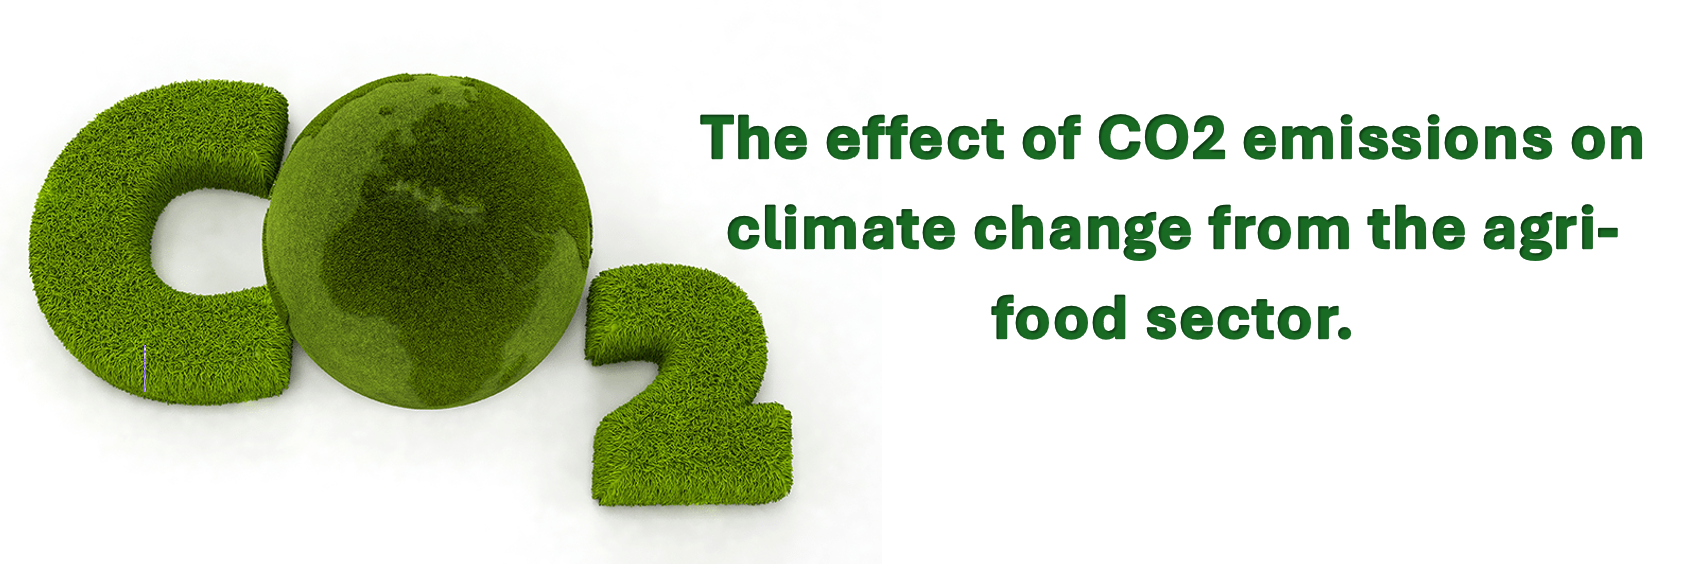

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview**](#chapter1)
    * [1.1 Introduction**](#section_1_1)
        * [1.1.1 Problem Statement**](#sub_section_1_1_1)
    * [1.2 Objectives**](#section_1_2)
* <b>[2. Importing Packages**](#chapter2)
* <b>[3. Loading Data**](#chapter3)
* <b>[4. Data Cleaning**](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)**](#chapter5)
* <b>[6. Feature Engineering**](#chapter6)</b>
* [7. Modeling](#chapter7)
* [8. Model Performance](#chapter8)
* [9. You will learn more in Machine Learning Sprints](#chapter9)
* <b>[10. Conclusion**](#chapter10)</b>
* [11. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>




> <b> Objective of the Project:</b> The aim of this project is to analyse and predict the effect of CO2 emissions on climate change from the agri-food sector. We aim to understand the impact of agricultural activities on climate change and develop strategies for sustainable practices. We will explore various emission sources, perform regression analysis to predict temperature variations. These study is of importance as it will enable us to offer recommendations and actionable insights for the stakeholders to contribute to the ongoing efforts to promote sustainability within the agri-food sector.

> <b> Data Source:</b> We use a comprehensive dataset compiled from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC). A data dictionary on the dataset features is given in ReadME (https://github.com/VuyiswaK/2401PTDS_Regression_Project/blob/main/README.md) file of the repository.

> <b> Key Questions or Hypotheses:</b> Outline the main questions you aim to answer or hypotheses you plan to test. This sets clear goals for your analysis and what the audience can expect to learn.

> <b> Methodology Overview:</b> Provide a brief overview of the methods and techniques you plan to use in your analysis. This doesn’t need to be detailed here but should give a taste of the analytical approach and tools.

> <b> Structure of the Notebook:</b> Describe the layout of the notebook. Explain the sections or parts of the analysis to help readers navigate through the content.

> <b> Expected Outcomes:</b> If applicable, mention what kind of results or findings you anticipate. This could be specific insights, predictive model performance, or impact assessment.

Link to project board: https://trello.com/b/pp38L0zb/regression-project

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

You can choose to include all of this information in the introduction or distribute it across various sections. Key points to remember:

+ To apply exploratory data analysis.
+ To implement feature engineering techniques to extract meaningful information.
+ To model and assess various supervised machine learning algorithms for the prediction ....

---

## 2. Importing Packages & Loading Data <a class="anchor" id="chapter2"></a>

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [24]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
# loading dataset
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
df.head() 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [26]:
# The copy of the dataframe
df_copy = df.copy()

First look at the shape of the dataframe by using `.shape`.

In [27]:
# Displays the number of rows and columns
df_copy.shape

(6965, 31)

The dataset consists of 6965 rows (observations) and 31 columns (features). 

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [28]:
## Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

---

## 3. Preliminary Data Cleaning <a class="anchor" id="chapter3"></a>

**Outliers**

Taken care of in feature scaling ? yes or no 

In [53]:
df_copy.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


**Missing data**

The `check_null_values` function iterates over each column in a DataFrame to identify and print the count of null values, providing column-specific null counts.

In [54]:
def check_null_values(df_copy):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    for column in df_copy:
        if df_copy[column].isnull().any():
            print('{0} has {1} null values'.format(column, df_copy[column].isnull().sum()))
check_null_values(df_copy)

Savanna fires has 31 null values
Forest fires has 93 null values
Crop Residues has 1389 null values
Forestland has 493 null values
Net Forest conversion has 493 null values
Food Household Consumption has 473 null values
IPPU has 743 null values
Manure applied to Soils has 928 null values
Manure Management has 928 null values
Fires in humid tropical forests has 155 null values
On-farm energy use has 956 null values


About 11 columns have missing values. Crop residues has the most missing values about **20% of data is missing**.  Threshold for when to 1) remove rows, 2) remove colums and 3) impute nulls

**Duplicates**

In [55]:
def count_duplicate_rows(df_copy):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df_copy (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df_copy.duplicated().sum()
    return duplicate_count
count_duplicate_rows(df_copy)

0

No duplicates

**Categorical features**

The only categorical feature in the data is Area. Do we include it in the analysis ? It may introduce regional bias. We check for cardinality, if a categorical feature has too many unique values (high cardinality), it may lead to overfitting. Consider excluding it or grouping rare values. Alternative we can evaluate the model performance with and without categorical features.
Compare performance metrics (accuracy, F1-score, etc.) to determine if including categorical data improves results.

In [56]:
len(df_copy.Area.unique())

236

**Establish dependent and independent variables**

We will deal with feature selection in the regression analysis step. For now we determine the potential response variables. In our case the aim is to predict CO2 emission thus, total emission should be our response variable.

---

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.
 

**$CO_2$ over time**

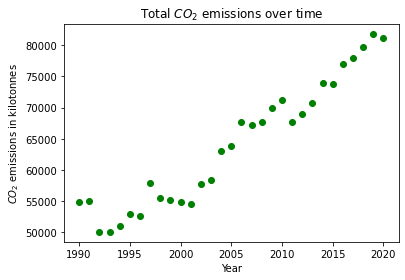

In [184]:
grouped = df_copy.groupby(['Year']).mean().reset_index()
plt.scatter(grouped.Year, grouped.total_emission, color = 'g')
plt.title('Total '+ r'$CO_2$' + ' emissions over time')
plt.xlabel('Year')
plt.ylabel( r'$CO_2$'+ ' emissions in kilotonnes')
plt.show()

$CO_2$ emission have been increasing throughout the years, at a rate of about x kts a year. This is indeed concerning

Time series analysis to what the co2 emission would be if this trajectory continue ? what is too much c02 emission threshold ?

**Contribution of $C0_2$ sources of emission to total emission.**

In [103]:
df_copy.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [160]:
emissions = ['Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Food Household Consumption', 'Food Retail', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests','Forestland','On-farm Electricity Use','On-farm energy use','Net Forest conversion']

df_copy_3 = df_copy.copy()
df_copy_3['total'] = df_copy[emissions].sum(axis =1)
df_copy_3['ratio'] = df_copy_3['total']/df_copy_3['total_emission']
print(max(df_copy_3.ratio),min(df_copy_3.ratio))


1.0000000000000655 0.9999999999999638


<AxesSubplot:xlabel='source'>

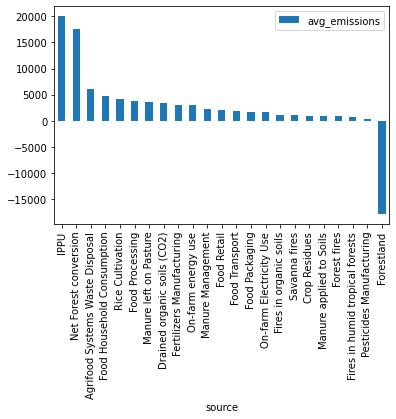

In [183]:
mean = [np.mean(df_copy[col]) for col in emissions]

em = pd.DataFrame({ 
    'source': emissions, 
    'avg_emissions': mean
}) 


em = em.sort_values(by='avg_emissions', ascending = False)
  
# plotting graph 
em.plot(x="source", y=['avg_emissions'], kind="bar") 

IPPU, Net Forest conversion, Forestland on average contribute the most to the total co2 emissions. The contributions by pesticides manufacturing, forest fires and fires in humid tropical forests are somewhat negligible

---

## 5. Regression Analysis <a class="anchor" id="chapter5"></a>

#### Check for Linearity

The first step in our analysis involves assessing the mathematical relationship between each predictor variable and the response variable. Linearity is a crucial aspect that we need to evaluate. A linear relationship implies that the change in the response variable *Y*, resulting from a one-unit change in the predictor $X_j$, remains consistent across different values of $X_j$.

If we attempt to fit a regression model to a dataset that exhibits non-linear patterns, the model may inadequately capture the underlying relationships within the data, leading to inaccuracies in predictions. To assess linearity, we often create scatter plots for each predictor against the response variable. This visual examination helps us identify any apparent linear trends in the data.

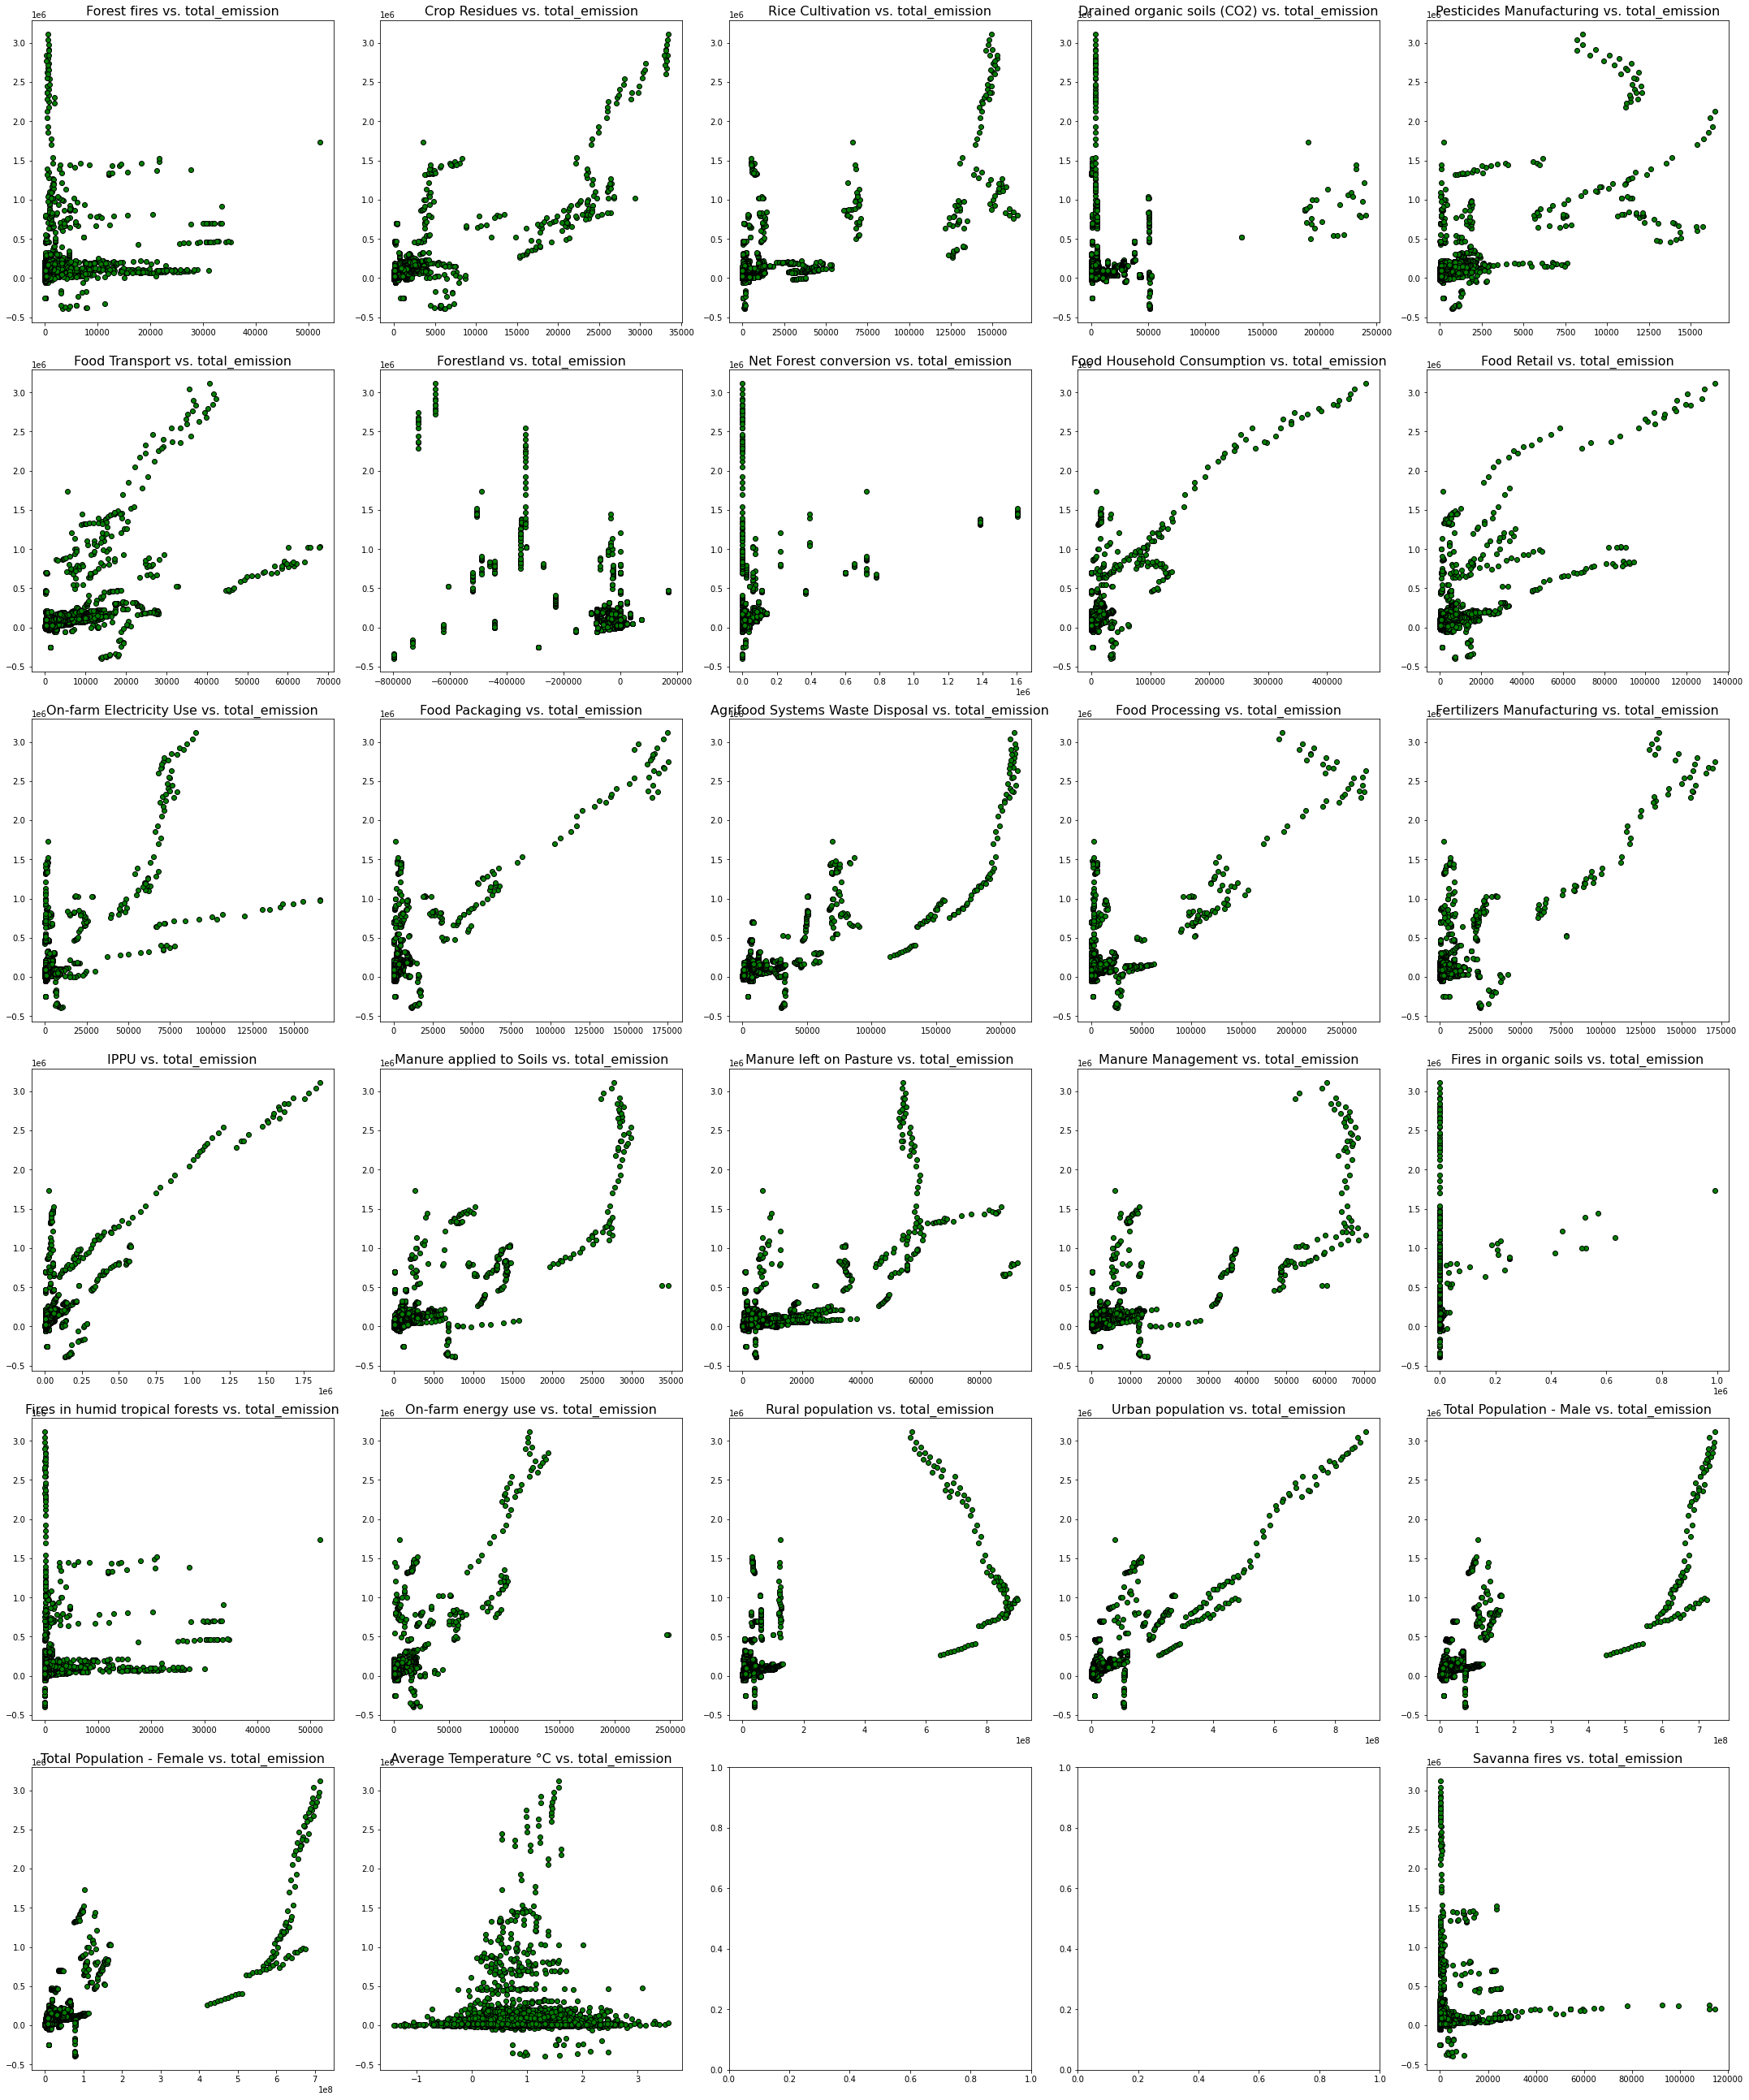

In [86]:
fig, axs = plt.subplots(6,5, figsize=(30,36),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Year', 'Area', 'total_emission'],axis = 1)

for index, column in enumerate(df_copy_2.columns):
    axs[index-1].set_title("{} vs. total_emission".format(column),fontsize=16)
    axs[index-1].scatter(x=df_copy_2[column],y=df_copy['total_emission'],color='green',edgecolor='k')
    
fig.tight_layout(pad=1)

#### Checking for multicollinearity

Multicollinearity refers to the presence of a strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

1.  It tends to increase the standard error of the coefficients estimates, making them less precise and leading to wider confidence intervals.

2. It becomes difficult to estimate the effect of any one predictor variable on the response variable because multicollinearity makes the coefficients sensitive to small changes in the model or the data, which can lead to unstable coefficient estimates.

We will test for multicollinearity by creating paired scatter plots of predictors and then creating a correlation heatmap.

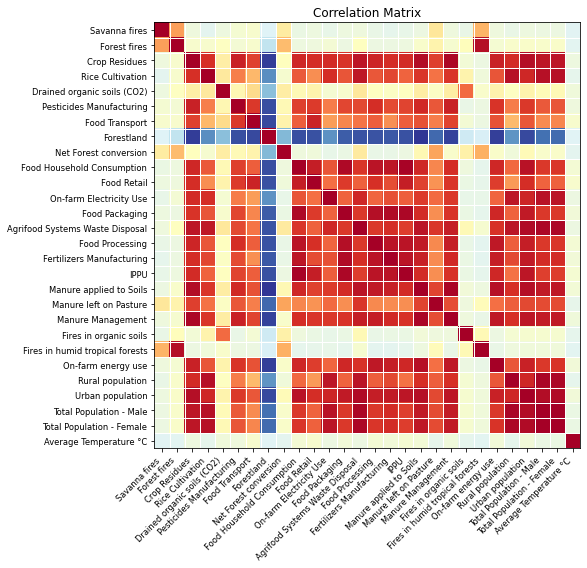

In [102]:
from statsmodels.graphics.correlation import plot_corr
corr = df_copy_2.corr()
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_corr(corr, xnames=corr.columns, ax=ax)
plt.show()

We can see several strong correlations among predictors, especially amongst the different types of co2 emssions. We note this as we continue to check the quality of our model. Predictors with little correlation are 1) savanna fires 2) forest fires 3) drained organic soils 4) net forest conversion 5) fires in organic soils 6) fires in humid tropical forests and 7) average temperature C (not correlated at all with the other predictors).

## 6. Feature Engineering <a class="anchor" id="chapter6"></a>

## 7. Modeling  <a class="anchor" id="chapter7"></a>

## 8. Model Performance   <a class="anchor" id="chapter8"></a>

Evaluate the quality of a regression model through a thorough analysis of its residuals. We meticulously examined four key statistical phenomena: **independence**, **homoscedasticity**, **normality**, and **outliers**.

## 10. Conclusion <a class="anchor" id="chapter10"></a>

> <b> Summary of Key Findings:</b> Recap the main insights and results discovered through the analysis. Highlight how these findings answer the initial questions or hypotheses set out in the introduction.

> <b> Evaluation of the Methodology:</b> Discuss the effectiveness of the methods and techniques used. Mention any limitations or challenges encountered during the analysis and how they were addressed or could be addressed in the future.

> <b> Implications of the Findings:</b> Explain the practical or theoretical implications of the results.Discuss how these findings can impact decision-making processes, policy, business strategies, or scientific understanding.

> <b> Suggestions for Future Work:</b> Propose areas for further research or additional questions that emerged from the project. Suggest improvements in data collection, analysis methods, or other aspects that could enhance future studies.

> <b> Reflection on the Data Source and Quality:</b> Reflect on the quality and reliability of the data used. Consider how the data source influenced the outcomes and what could be improved in terms of data quality or variety.

> <b>Concluding Thoughts:</b> Offer a final thought or summary statement that encapsulates the essence of the project and its impact. Encourage readers to consider broader applications or the next steps following from the project’s conclusions.

#### <a href=#cont>Back to Table of Contents</a>

---

## 11. References <a class="anchor" id="chapter11"></a>

Maintaining clear and organized documentation is crucial for reproducibility and credibility. Harvard referencing, a widely recognized citation style, can be effectively applied to data science notebooks to ensure proper acknowledgment of sources and facilitate the tracing of data and methodologies back to their origins.

1. Citing Data Sources: When gathering datasets for analysis, it's essential to cite the origin of the data. This includes providing details such as the author, publication date, title, and source of the dataset. In your notebook, you can include inline citations for each dataset you use, following the Harvard referencing format. 

<div class="alert alert-block alert-warning">
<b>Example:</b> The World Bank. (2020). World Development Indicators. Retrieved from https://datacatalog.worldbank.org/dataset/world-development-indicators
</div>

2. Referencing Research Papers: Data science often involves building upon existing research. Whether you're utilizing algorithms, methodologies, or theories from academic papers, it's important to reference them properly. Include citations for relevant papers within your notebook, both in the narrative sections and within code comments where applicable.

<div class="alert alert-block alert-warning">
<b>Example:</b> Smith, J., & Doe, A. (2018). Predictive Modeling Techniques for Financial Forecasting. Journal of Data Science, 10(2), 123-135.
</div>

3. Code Libraries and Packages: Data science projects heavily rely on various libraries and packages for analysis and visualization. When utilizing third-party code, make sure to acknowledge the creators by referencing the relevant documentation or papers associated with those tools.

<div class="alert alert-block alert-warning">
<b>Example:</b> Matplotlib Development Team. (2020). Matplotlib: A 2D plotting library. Retrieved from https://matplotlib.org/
</div>

4. Acknowledging Scholarly Contributions: If you've consulted online forums, blogs, or other informal resources during your project, it's courteous to acknowledge these contributions. While Harvard referencing is traditionally used for academic sources, you can adapt it to reference online resources as well.

<div class="alert alert-block alert-warning">
<b>Example:</b> Kaggle. (2021). Titanic: Machine Learning from Disaster. Retrieved from https://www.kaggle.com/c/titanic
</div>


#### <a href=#cont>Back to Table of Contents</a>

---

<div class="alert alert-block alert-success">
<b>Another thing to consider:</b> Take a look at the notebooks uploaded on Athena to explore different methods for incorporating specific elements into your own notebooks.
</div>